In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [3]:
! unzip '../input/walmart-recruiting-store-sales-forecasting/test.csv.zip'
! unzip '../input/walmart-recruiting-store-sales-forecasting/train.csv.zip'
! unzip '../input/walmart-recruiting-store-sales-forecasting/features.csv.zip'

Archive:  ../input/walmart-recruiting-store-sales-forecasting/test.csv.zip
  inflating: test.csv                
Archive:  ../input/walmart-recruiting-store-sales-forecasting/train.csv.zip
  inflating: train.csv               
Archive:  ../input/walmart-recruiting-store-sales-forecasting/features.csv.zip
  inflating: features.csv            


# **Import Dataset**

In [4]:
train = pd.read_csv('./train.csv')
train 

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
features = pd.read_csv('./features.csv')
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
stores = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/stores.csv')
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
train_st = train.sample(n=10000)
train_st = train_st.reset_index()
train_st = train_st.drop('index', axis=1)
train_st

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,5,85,2011-06-10,1059.72,False
1,24,74,2011-04-08,15183.64,False
2,31,10,2012-07-06,24334.58,False
3,10,97,2012-03-02,5302.21,False
4,15,92,2010-11-19,21591.49,False
...,...,...,...,...,...
9995,27,58,2010-07-02,2022.00,False
9996,13,60,2011-12-30,651.20,True
9997,10,17,2011-09-16,26510.56,False
9998,27,72,2010-11-26,420586.57,True


**Only 10000 samples were selected due to computational limitation of a laptop.**

# **Feature Engineering**

# Extract Year, Month, Day from Date

In [8]:
def extract_date(df): 
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month 
    df['day'] = pd.DatetimeIndex(df['Date']).day 
    return df 
extract_date(train_st)
extract_date(features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,month,day
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,2,5
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010,2,12
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010,2,19
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,2010,2,26
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,2013,6,28
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,2013,7,5
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,2013,7,12
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,2013,7,19


In [9]:
def add_features(train_set, features_set):
    t_col = train_set.columns 
    f_col = features_set.columns 
    for i in range(len(train_set)): 
        for j in range(len(features_set)): 
            if train_set.iloc[i, t_col.get_loc("year")] == features_set.iloc[j, f_col.get_loc("year")] and train_set.iloc[i, t_col.get_loc("month")] == features_set.iloc[j, f_col.get_loc("month")] and train_set.iloc[i, t_col.get_loc("day")] == features_set.iloc[j, f_col.get_loc("day")]: 
                train_set.loc[i, 'Temperature'] = features_set.loc[j, 'Temperature'] 
                train_set.loc[i, 'Fuel_Price'] = features_set.loc[j, 'Fuel_Price']
                break 
add_features(train_st, features)
train_st['Store_size'] = stores['Size'] 
train_st['Store_type'] = stores['Type']

# Seasonality Indicator

In [10]:
#Simple Monthly Seasonality Indicator for Fuel Price and Temperature using sine and cosine functions 
train_st['sin(month)'] = np.sin((train_st['month'] / 12) * 2 * np.pi)
train_st['cos(month)'] = np.sin((train_st['month'] / 12) * 2 * np.pi)
train_st

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,day,Temperature,Fuel_Price,Store_size,Store_type,sin(month),cos(month)
0,5,85,2011-06-10,1059.72,False,2011,6,10,83.13,3.648,151315.0,A,1.224647e-16,1.224647e-16
1,24,74,2011-04-08,15183.64,False,2011,4,8,67.84,3.622,202307.0,A,8.660254e-01,8.660254e-01
2,31,10,2012-07-06,24334.58,False,2012,7,6,81.57,3.227,37392.0,B,-5.000000e-01,-5.000000e-01
3,10,97,2012-03-02,5302.21,False,2012,3,2,60.96,3.630,205863.0,A,1.000000e+00,1.000000e+00
4,15,92,2010-11-19,21591.49,False,2010,11,19,51.41,2.771,34875.0,B,-5.000000e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,27,58,2010-07-02,2022.00,False,2010,7,2,80.91,2.669,NaN,NaN,-5.000000e-01,-5.000000e-01
9996,13,60,2011-12-30,651.20,True,2011,12,30,44.55,3.129,NaN,NaN,-2.449294e-16,-2.449294e-16
9997,10,17,2011-09-16,26510.56,False,2011,9,16,79.94,3.526,NaN,NaN,-1.000000e+00,-1.000000e+00
9998,27,72,2010-11-26,420586.57,True,2010,11,26,64.52,2.735,NaN,NaN,-5.000000e-01,-5.000000e-01


In [11]:
import statistics
def sales_by(train_set, feature): 
    weekly_sales = train_set['Weekly_Sales']
    for i in range(len(weekly_sales)):
        list = weekly_sales[train_set[feature] == train_set.loc[i, feature]]
        new_feature_name = 'Sale_by_' + feature 
        train_set.loc[i, new_feature_name] = statistics.median(list)
sales_by(train_st, 'Store')
sales_by(train_st, 'Dept')
sales_by(train_st, 'month')
sales_by(train_st, 'year')
train_st

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,day,Temperature,Fuel_Price,Store_size,Store_type,sin(month),cos(month),Sale_by_Store,Sale_by_Dept,Sale_by_month,Sale_by_year
0,5,85,2011-06-10,1059.72,False,2011,6,10,83.13,3.648,151315.0,A,1.224647e-16,1.224647e-16,2856.320,1963.530,8249.705,7549.55
1,24,74,2011-04-08,15183.64,False,2011,4,8,67.84,3.622,202307.0,A,8.660254e-01,8.660254e-01,12392.680,14643.310,8096.900,7549.55
2,31,10,2012-07-06,24334.58,False,2012,7,6,81.57,3.227,37392.0,B,-5.000000e-01,-5.000000e-01,9082.680,16006.405,7914.000,7261.03
3,10,97,2012-03-02,5302.21,False,2012,3,2,60.96,3.630,205863.0,A,1.000000e+00,1.000000e+00,15900.555,14449.620,7313.800,7261.03
4,15,92,2010-11-19,21591.49,False,2010,11,19,51.41,2.771,34875.0,B,-5.000000e-01,-5.000000e-01,5172.470,62551.760,7882.990,8213.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,27,58,2010-07-02,2022.00,False,2010,7,2,80.91,2.669,NaN,NaN,-5.000000e-01,-5.000000e-01,13483.270,2497.000,7914.000,8213.95
9996,13,60,2011-12-30,651.20,True,2011,12,30,44.55,3.129,NaN,NaN,-2.449294e-16,-2.449294e-16,13964.250,360.000,8865.590,7549.55
9997,10,17,2011-09-16,26510.56,False,2011,9,16,79.94,3.526,NaN,NaN,-1.000000e+00,-1.000000e+00,15900.555,9574.730,7944.090,7549.55
9998,27,72,2010-11-26,420586.57,True,2010,11,26,64.52,2.735,NaN,NaN,-5.000000e-01,-5.000000e-01,13483.270,43003.310,7882.990,8213.95


In [12]:
train_st.isna().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
year                0
month               0
day                 0
Temperature         0
Fuel_Price          0
Store_size       9955
Store_type       9955
sin(month)          0
cos(month)          0
Sale_by_Store       0
Sale_by_Dept        0
Sale_by_month       0
Sale_by_year        0
dtype: int64

**Because store size and type features has approximately 1/3 of its data as na, they should be dropped.**

In [13]:
train_st = train_st.drop(['Store_size', 'Store_type'], axis=1)

# **Data Exploration**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 12 artists>

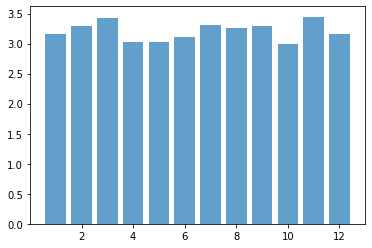

In [16]:
months = train_st['month'].unique()
fuel_price_by_month = train_st.groupby(train_st['month'])['Fuel_Price'].mean()
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(months, fuel_price_by_month, align='center', alpha=0.7)

<BarContainer object of 3 artists>

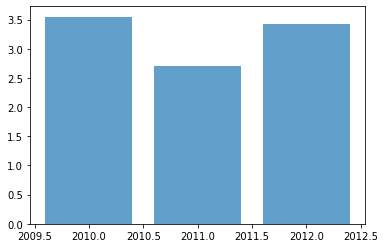

In [17]:
years = train_st['year'].unique()
fuel_price_by_year = train_st.groupby(train_st['year'])['Fuel_Price'].mean()
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(years, fuel_price_by_year, align='center', alpha=0.7)

<BarContainer object of 143 artists>

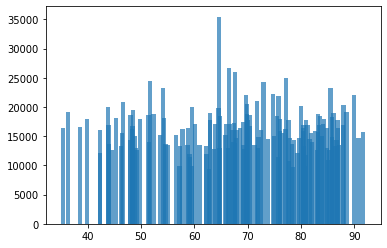

In [18]:
temp = train_st['Temperature'].unique()
weekly_sales = train_st.groupby(train_st['Temperature'])['Weekly_Sales'].mean()
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(temp, weekly_sales, align='center', alpha=0.7)

# **Distribution Normalization** 

In [21]:
import scipy
from scipy.stats import skew

# Original Distribution of weekly sales

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.7622939122922587


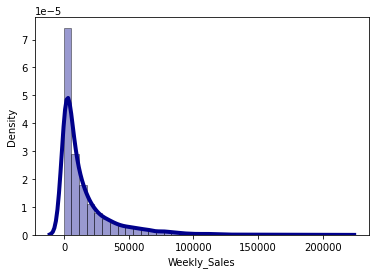

In [56]:
original = train_st['Weekly_Sales']
sns.distplot(original, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print(skew(np.array(original), axis=0, bias=True, nan_policy = "omit"))

# Transform the weekly sales using power functions

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.4304808940594978


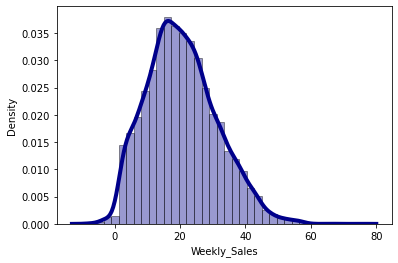

In [24]:
#(weekly_sales)^(1/3)
norm_1_3 = np.cbrt(train_st['Weekly_Sales'])
sns.distplot(norm_1_3, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print(skew(np.array(norm_1_3), axis=0, bias=True, nan_policy = "omit"))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.06471103908785464


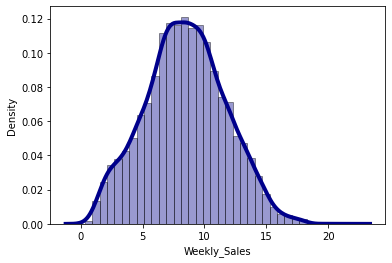

In [27]:
#(weekly_sales)^(1/4.2)
norm_1_42 = np.power(train_st['Weekly_Sales'], 1/4.2)
sns.distplot(norm_1_42, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print(skew(np.array(norm_1_42), axis=0, bias=True, nan_policy = "omit"))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.5369317606026773


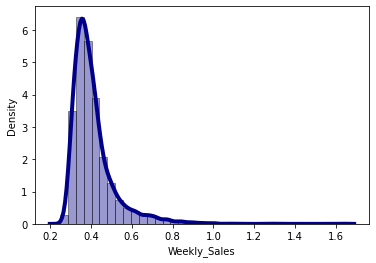

In [34]:
#(weekly_sales)^(1/5)
norm_1_5 = np.power(train_st['Weekly_Sales'], 1/5)
sns.distplot(norm_1_5, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print(skew(np.array(norm_1_5), axis=0, bias=True, nan_policy = "omit"))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.2712413226967943


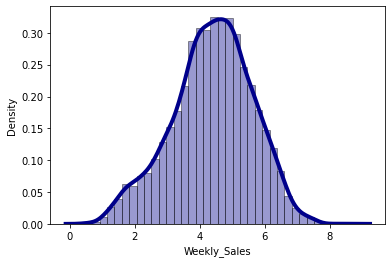

In [29]:
#(weekly_sales)^(1/6)
norm_1_6 = (np.power(train_st['Weekly_Sales'], 1/6))
sns.distplot(norm_1_6, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print(skew(np.array(norm_1_6), axis=0, bias=True, nan_policy = "omit"))

# Gradient Descent Algorithm to find the optimal power to normalize distribution

In normal distribution, mean and median is equivalent.

Suppose there is dataset $X$ = {$ x_n | n \in N $}. The mean of the dataset is $E(x)$, and the median is $x_m$. 

Define polynomial transformation $T$: $X$ -> $Y = X^k, k \in R$

Under transformation, $E(Y) = E(X^k) = \frac{\Sigma_{n=1}^{len(X)} x^k}{len(X)}$

Under transformation, the median becomes $y_m$ = $x_m ^ k$

Suppose the difference $D_x$ between $E(X)$ and $x_m$ can be measured as $|E(x) - x_m|$

Then, 
$D_y$ = |$E(Y) - y_m$| = $|\frac{\Sigma_{n=1}^{len(X)} x^k}{len(X)} - x_m ^k|$

$\frac{\partial D_y}{\partial k}$ = $|\frac{\Sigma_{n=1}^{len(X)} x^k*ln(k)}{len(X)} - x_m ^k * ln(k)|$

$k := k - \eta\frac{\partial D_y}{\partial k} = k - \eta|\frac{\Sigma_{n=1}^{len(X)} x^k*ln(k)}{len(X)} - x_m ^k * ln(k)|$

where $\eta$ is a learning rate.

This is gradient descent algorithm to find the optimal k where weekly sales disbritution gets closest to the normal in which mean and median is same.  

# **Build Multi-Layer Perceptron Regressor**

In [29]:
#mlpregressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = train_st.drop(['Weekly_Sales', 'Date', 'year','month', 'day'], axis=1)
y = train_st['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

# Scale the features for faster convergence

In [30]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

# Create a set of weekly sales normalized by cube-root function.

In [33]:
#(weekly_sales)^1/3
y_train_cbrt = np.cbrt(y_train)
y_test_cbrt = np.cbrt(y_test)

# Train a model on original set of weekly sales. 

In [35]:
clf = MLPRegressor(hidden_layer_sizes=(256,128,64,64),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.17144309259694668


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Train a model on normalized set of weekly sales. 

In [36]:
clf_cbrt = MLPRegressor(hidden_layer_sizes=(256,128,64,64),activation="relu",random_state=1).fit(X_trainscaled, y_train_cbrt)
y_pred_cbrt = clf_cbrt.predict(X_testscaled)
print(clf_cbrt.score(X_testscaled, y_test_cbrt))

0.3981691546080972


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Validate and compare a model trained by original set and a model trained by normalized set

In [31]:
from sklearn.metrics import mean_absolute_error 
mae_cbrt = mean_absolute_error(np.power(y_pred_cbrt, 3), np.power(y_test_cbrt, 3))
mae = mean_absolute_error(y_pred, y_test)
print('MAE:',mae)
print('MAE with cube root distribution:',mae_cbrt)

MAE: 5927.178479316913
MAE with cube root distribution: 5698.141778471175


**In conclusion, the cube-root normalization led multi-perceptron perceptron regressor to have mean absolute error reduced by 5%.**